# Topic 2. Layers Operations

This tutorial will introduce the basic math operations for general CNN architecture with Pytorch. We will give you some examples. 

## Outline
    * Convolution
    * MaxPooling
    * Activation function
    --------------------------
    * Disussion
    * Reference

In [8]:
##########################################
#                                        #
#            Import the package          #
#                                        #
##########################################

%matplotlib inline

# Pytorch package
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

# Powerful array package for scientific computing
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import os
from skimage import io, transform

## Convolution

### Introduction
Convolution has the nice property of being translational invariant. Intuitively, this means that each convolution filter represents a feature of interest (e.g whiskers, fur), and the CNN algorithm learns which features comprise the resulting reference. You may be told about "Convolution is the method for feature learning". But how does it work? <font color='blue'>[Ref link](https://algobeans.com/2016/01/26/introduction-to-convolutional-neural-network/)</font>

### How does it work


There is an example that how to apply `Conv2d` operation on the image with Pytorch.

###### <font color='red'>I assigned the kernel here. But in fact, the kernel of the Conv2D is learned by the training step when using CNN.</font>

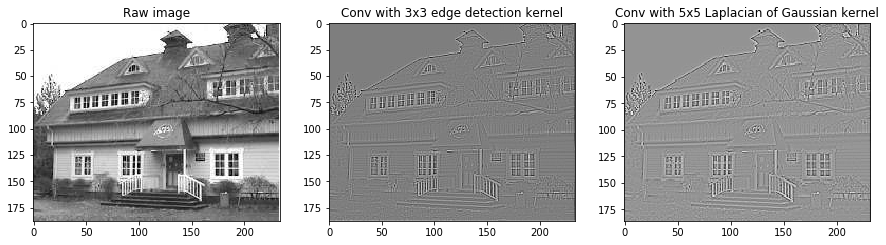

In [16]:
img = io.imread(os.path.join('image/img0202_2.jpg'), as_grey=True)

my_kernel1 = torch.Tensor([[-1 ,-1, -1],[-1, 8 ,-1], [-1, -1 ,-1]])
my_kernel2 = torch.Tensor([[0 ,0, -1, 0, 0],[0, -1, -2, -1, 0],
                           [-1 ,-2, 16, -2, -1],[0, -1, -2, -1, 0],
                           [0 ,0, -1, 0, 0]])
# Calling this turns tensor into "weight" parameter
my_kernel1 = torch.nn.Parameter(my_kernel1.reshape(1, 1, 3, 3)) 
my_kernel2 = torch.nn.Parameter(my_kernel2.reshape(1, 1, 5, 5))                            

# Declare the Conv2d object for convolution operation
conv1 = torch.nn.Conv2d(in_channels=1,
                        out_channels=1,
                        kernel_size=3,
                        stride=1,
                        padding=1,
                        bias=True)

conv2 = torch.nn.Conv2d(in_channels=1,
                        out_channels=1,
                        kernel_size=5,
                        stride=1,
                        padding=1,
                        bias=True)

# Show the pre-initalized weight from Conv2d, you will see the bias in the initial kernel
#print('Pre-initalized weight', conv1.weight)

# Simply copying over the new weight 
conv1.weight = my_kernel1
conv2.weight = my_kernel2

# Apply the operation on the image
img_conv1 = conv1(torch.from_numpy(img.reshape(1, 1, img.shape[0], img.shape[1])).float()).detach()
img_conv2 = conv2(torch.from_numpy(img.reshape(1, 1, img.shape[0], img.shape[1])).float()).detach()

# For plotting
plt.figure(1, figsize=(15, 6))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Raw image')
plt.subplot(132)
plt.imshow(img_conv1[0][0].numpy(), cmap='gray')
plt.title('Conv with 3x3 edge detection kernel')
plt.subplot(133)
plt.imshow(img_conv2[0][0].numpy(), cmap='gray')
plt.title('Conv with 5x5 Laplacian of Gaussian kernel')

plt.show()

### summary

Try to change the `padding` or `stride` in the declartion of Conv2d , you can see the results of different kernel parameter. In other words, you can say that different features would be extracted by different filter.

## MaxPooling

### Introdution
It is common to periodically insert a Pooling layer in-between successive Conv layers in a ConvNet architecture. Its function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network, and hence to also control overfitting.
[Ref link: CS231](http://cs231n.github.io/convolutional-networks/)

### How does it work

There is an example that how to apply `MaxPool2d` operation on the image with Pytorch.


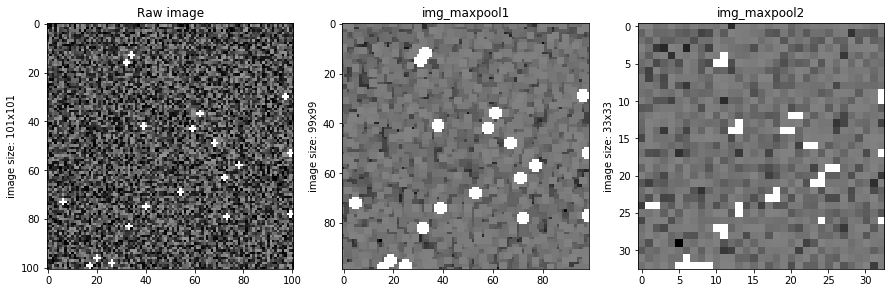

In [3]:
import random
# Generate a random image with specific size, and add some bright points as features
img = torch.rand(101, 101) * 0.6
for i in range(1,20):
    x = random.randint(0,img.shape[0]-2)
    y = random.randint(0,img.shape[1]-2)
    img[x][y] = img[x+1][y] = img[x-1][y] = img[x][y+1] = img[x][y-1] = 1  

# Declare the MaxPool2d object for subsampling
maxpool1 = nn.MaxPool2d(kernel_size=3,
                       stride=1)
maxpool2 = nn.MaxPool2d(kernel_size=3,
                       stride=3)

# Apply the MaxPool2d on the image
img_maxpool1 = maxpool1(img.reshape(1, 1, img.shape[0], img.shape[1]))
img_maxpool2 = maxpool2(img.reshape(1, 1, img.shape[0], img.shape[1]))

# For plotting
plt.figure(1, figsize=(15, 6))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Raw image')
plt.ylabel('image size: %dx%d' % (img.shape[0], img.shape[1]))
plt.subplot(132)
plt.imshow(img_maxpool1[0][0], cmap='gray')
plt.title('img_maxpool1')
plt.ylabel('image size: %dx%d' % (img_maxpool1.shape[2], img_maxpool1.shape[3]))
plt.subplot(133)
plt.ylabel('fuck')
plt.imshow(img_maxpool2[0][0], cmap='gray')
plt.title('img_maxpool2')
plt.ylabel('image size: %dx%d' % (img_maxpool2.shape[2], img_maxpool2.shape[3]))

plt.show()

  ### Summary
  
  As you can see, the MaxPooling is a function like subsampling but not losing the own features of image . The are many method of subsampling but MaxPooling is the most popular.

## Activation function

### Introduction
The activation layer controls how the signal flows from one layer to the next, emulating how neurons are fired in our brain. Output signals which are strongly associated with past references would activate more neurons, enabling signals to be propagated more efficiently for identification.

CNN is compatible with a wide variety of complex activation functions to model signal propagation, the most common function being the Rectified Linear Unit (ReLU), which is favored for its faster training speed.
[Ref link](https://algobeans.com/2016/01/26/introduction-to-convolutional-neural-network/)

### How does it works

There are some kind of activation function declared in `torch.nn.functional`.

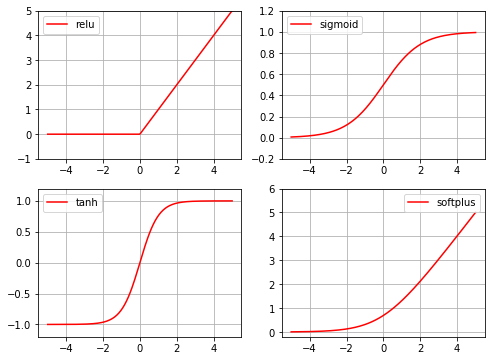

In [18]:
x = torch.linspace(-5, 5, 200)
x = Variable(x)

x_np = x.data.numpy()           # The reason why need to change data type to nparray is just for plotting

# A few of activations
y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()


# For plotting
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')
plt.grid()

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')
plt.grid()

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')
plt.grid()

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')
plt.grid()

plt.show()


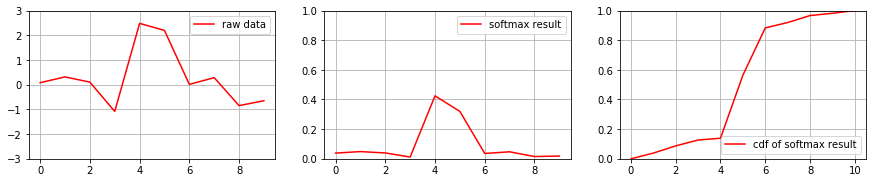

In [108]:
import random
# Softmax is also in torch.nn.functional
x = torch.randn(10) * 0.8
idx = random.randint(0, x.shape[0]-1)
x[idx] = x[idx] + abs(x[idx]) * 5
#print(x)


y_softmax = F.softmax(x, dim=0)


# Calculate the CDF of softmax result, you will see the sum of softmax result is equal to 1
y_cdf = torch.zeros(x.shape[0] + 1)
for i in range(1, x.shape[0] + 1):
    y_cdf[i] = y_cdf[i-1] + y_softmax[i-1]
#print(y_cdf)


plt.figure(1, figsize=(15, 6))
plt.subplot(231)
plt.plot(x.data.numpy() , c='red', label='raw data')
plt.ylim((-3, 3))
plt.legend(loc='best')
plt.grid()
plt.subplot(232)
plt.plot(y_softmax.data.numpy() , c='red', label='softmax result')
plt.ylim((0, 1))
plt.legend(loc='best')
plt.grid((-8, 0))
plt.subplot(233)
plt.plot(y_cdf.data.numpy() , c='red', label='cdf of softmax result')
plt.ylim((0, 1))
plt.legend(loc='best')
plt.grid()

plt.show()

### Summary

The softmax result work with functions that map to the unconstrained space of scores (x1,...,x𝑛), and then map those scores to the space of probability vectors in the last step.  This allows you to divide up the problem into 𝑛 subproblems of predicting 𝑦1,...,𝑦𝑛, and it's also a generalization of logistic regression.


========================================================================================================================

## Discussion

    1. Could you tell someone briefly how does the convolution operation work for feature extraction?
    2. With the formulation of Conv2D, What does the CNN model learn in the Convolution layer?
    3. How does the Softmax function work in classification problem?

## Reference:
    - act func ref:(https://morvanzhou.github.io/tutorials/machine-learning/torch/2-03-activation/-
    - cnn ref  : https://pytorch.org/tutorials/beginner/nlp/deep_learning_tutorial.html
    - conv2 ref: https://discuss.pytorch.org/t/how-to-define-the-kernel-size-for-conv2d/21777/5
    - image ref: https://tev-static.fbk.eu/TeV/Technologies/TextInScene_files/I1.html
    